In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
anime = pd.read_csv('/content/drive/MyDrive/Dataset/anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
rating = pd.read_csv('/content/drive/MyDrive/Dataset/rating.csv')
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [ ]:
# Package imports
from zipfile import ZipFile

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
anime[["rating", "members"]].describe()

,rating,members
count,12064.000000,1.229400e+04
mean,6.473902,1.807134e+04
std,1.026746,5.482068e+04
min,1.670000,5.000000e+00
25%,5.880000,2.250000e+02
50%,6.570000,1.550000e+03
75%,7.180000,9.437000e+03
max,10.000000,1.013917e+06


In [ ]:
# Grouped descriptive statistics
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
anime \
    .groupby('type')["rating"] \
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max']) \
    .transpose()

type,Movie,Music,ONA,OVA,Special,TV
mean,6.318058,5.588996,5.643298,6.375221,6.523501,6.902299
std,1.211988,0.958440,1.127091,0.858358,0.887762,0.863526
min,1.920000,3.280000,2.580000,2.000000,1.670000,2.670000
q25,5.420000,5.010000,4.870000,5.850000,6.085000,6.440000
median,6.470000,5.625000,5.755000,6.380000,6.630000,6.940000
q75,7.250000,6.152500,6.412500,6.920000,7.110000,7.460000
max,10.000000,8.380000,8.260000,9.250000,8.660000,9.600000


In [ ]:
ratings = rating[rating["rating"] != -1]

ratings.groupby(["rating"])["rating"].count()

rating
1       16649
2       23150
3       41453
4      104291
5      282806
6      637775
7     1375287
8     1646019
9     1254096
10     955715
Name: rating, dtype: int64

There are 6337241 rating posted.
From total 69600 unique user id.
And rate total 12294 different animes.


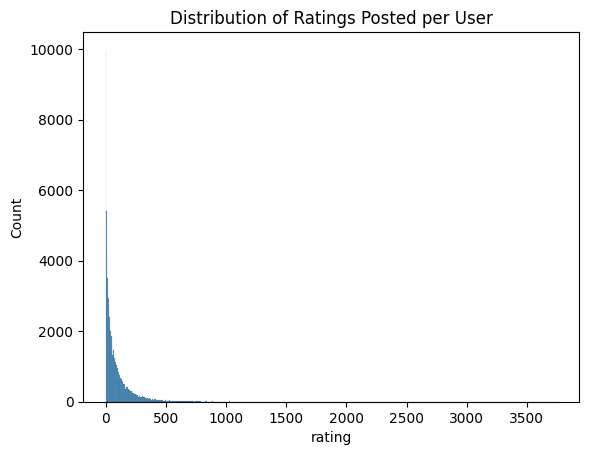

In [ ]:
# number of ratings
print("There are", str(len(ratings)), "rating posted.")

# number of users
print("From total", str(len(ratings['user_id'].unique())), "unique user id.")

# number of unique animes (in anime list, not ratings)
print("And rate total", str(len(anime['anime_id'].unique())), "different animes.")

# avg number of anime rated per user
ratings_per_user = ratings.groupby('user_id')['rating'].count()
statistics.mean(ratings_per_user.tolist())

# distribution of ratings posted per user
_ = plt.title('Distribution of Ratings Posted per User')
_ = sns.histplot(ratings_per_user)
plt.show()

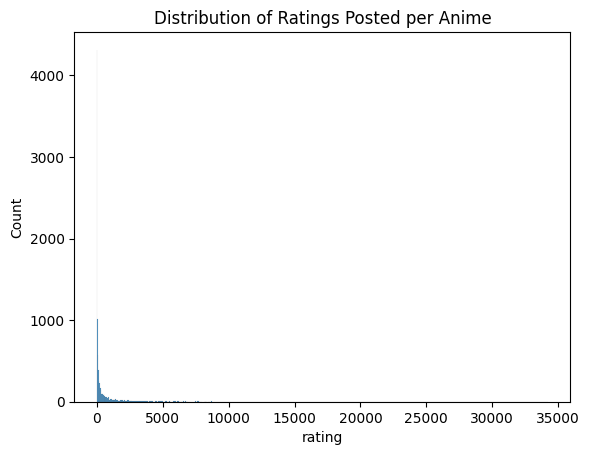

In [ ]:
# avg number of ratings given per anime
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()
statistics.mean(ratings_per_anime.tolist())

# distribution of ratings per anime
_ = plt.title('Distribution of Ratings Posted per Anime')
_ = sns.histplot(ratings_per_anime)
plt.show()

In [ ]:
# counts of ratings per anime as a df
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)
# ratings_per_anime_df.sort_values('rating', ascending=False).head()

# remove if < 1000 ratings
filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= 1000]

# build a list of anime_ids to keep
popular_anime = filtered_ratings_per_anime_df.index.tolist()
popular_anime

[1,
 5,
 6,
 7,
 15,
 16,
 18,
 19,
 20,
 22,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 71,
 72,
 73,
 74,
 76,
 77,
 79,
 80,
 81,
 90,
 91,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 109,
 114,
 119,
 120,
 121,
 122,
 123,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 153,
 154,
 155,
 156,
 157,
 160,
 161,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 174,
 177,
 180,
 181,
 182,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 195,
 196,
 198,
 199,
 202,
 205,
 208,
 209,
 210,
 223,
 225,
 226,
 227,
 228,
 232,
 237,
 238,
 239,
 240,
 241,
 243,
 245,
 246,
 248,
 249,
 250,
 251,
 256,
 257,
 263,
 264,
 265,
 267,
 268,
 269,
 270,
 272,
 274,
 276,
 288,
 297,
 298,
 304,
 306,
 317,
 320,
 322,
 323,
 325,
 326,
 329,
 330,
 339,
 341,
 343,
 355,
 356,
 357,
 368,
 371,
 372,
 376,
 379,
 3

In [ ]:
# counts ratings per user as a df
ratings_per_user_df = pd.DataFrame(ratings_per_user)

# remove if < 500
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 500]

# build a list of user_ids to keep
prolific_users = filtered_ratings_per_user_df.index.tolist()

In [ ]:
filtered_ratings = ratings[ratings.anime_id.isin(popular_anime)]
filtered_ratings = ratings[ratings.user_id.isin(prolific_users)]
len(filtered_ratings)

1005314

In [ ]:
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')

# replace NaN values with 0
rating_matrix = rating_matrix.fillna(0)

# display the top few rows
rating_matrix.head()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import operator

def similar_users(user_id, matrix, k=3):
    # create a df of just the current user
    user = matrix[matrix.index == user_id]

    # and a df of all other users
    other_users = matrix[matrix.index != user_id]

    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()

    # create list of indices of these users
    indices = other_users.index.tolist()

    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))

    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()

    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]

    return users

current_user = 226

# try it out
similar_user_indices = similar_users(current_user, rating_matrix)
print(similar_user_indices)

[30773, 39021, 45603]


In [ ]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):

    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    # convert to dataframe so its easy to sort and filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])


    # load vector for the current user
    user_df = matrix[matrix.index == user_index]
    # transpose it so its easier to filter
    user_df_transposed = user_df.transpose()
    # rename the column as 'rating'
    user_df_transposed.columns = ['rating']
    # remove any rows without a 0 value. Anime not watched yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
    # generate a list of animes the user has not seen
    animes_unseen = user_df_transposed.index.tolist()

    # filter avg ratings of similar users for only anime the current user has not seen
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(animes_unseen)]
    # order the dataframe
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
    # grab the top n anime
    top_n_anime = similar_users_df_ordered.head(items)
    top_n_anime_indices = top_n_anime.index.tolist()
    # lookup these anime in the other dataframe to find names
    anime_information = anime[anime['anime_id'].isin(top_n_anime_indices)]

    return anime_information #items

# try it out
recommend_item(226, similar_user_indices, rating_matrix)

,anime_id,name,genre,type,episodes,rating,members
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
39,12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620
87,10030,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.53,151561
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
184,7674,Bakuman.,"Comedy, Romance, Shounen",TV,25,8.35,246899


In [ ]:
def recommend_item(user_index, similar_user_indices, matrix, anime, items=5):

    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    # convert to dataframe so it's easy to sort and filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])

    # load vector for the current user
    user_df = matrix[matrix.index == user_index]
    # transpose it so it's easier to filter
    user_df_transposed = user_df.transpose()
    # rename the column as 'rating'
    user_df_transposed.columns = ['rating']
    # remove any rows without a 0 value. Anime not watched yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating'] == 0]
    # generate a list of animes the user has not seen
    animes_unseen = user_df_transposed.index.tolist()

    # filter avg ratings of similar users for only anime the current user has not seen
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(animes_unseen)]
    # order the dataframe
    similar_users_df_ordered = similar_users_df_filtered.sort_values(by=['mean'], ascending=False)
    # grab the top n anime
    top_n_anime = similar_users_df_ordered.head(items)
    top_n_anime_indices = top_n_anime.index.tolist()  # Obtaining indices of top-rated anime

    # lookup these anime in the other dataframe to find names
    anime_information = anime[anime['anime_id'].isin(top_n_anime_indices)]

    # Filter top animes by type 'Movie'
    top_movie_anime = anime_information[anime_information['type'] == 'Movie'].head(items)

    return top_movie_anime

# Assuming 'similar_user_indices', 'rating_matrix', and 'anime' are defined somewhere

# Try it out
recommended_movies = recommend_item(226, similar_user_indices, rating_matrix, anime, items=5)
print(recommended_movies)


Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members]
Index: []


In [ ]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):

    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    # convert to dataframe so it's easy to sort and filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])

    # load vector for the current user
    user_df = matrix[matrix.index == user_index]
    # transpose it so it's easier to filter
    user_df_transposed = user_df.transpose()
    # rename the column as 'rating'
    user_df_transposed.columns = ['rating']
    # remove any rows without a 0 value. Anime not watched yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating'] == 0]
    # generate a list of animes the user has not seen
    animes_unseen = user_df_transposed.index.tolist()

    # filter avg ratings of similar users for only anime the current user has not seen
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(animes_unseen)]
    # order the dataframe
    similar_users_df_ordered = similar_users_df_filtered.sort_values(by=['mean'], ascending=False)
    # grab the top n anime
    top_n_anime = similar_users_df_ordered.head(items)
    top_n_anime_indices = top_n_anime.index.tolist()  # Obtaining indices of top-rated anime

    # lookup these anime in the other dataframe to find names
    anime_information = anime[anime['anime_id'].isin(top_n_anime_indices)]

    # Filter top animes by type 'Movie'
    top_movie_anime = anime_information[anime_information['type'] == 'Movie'].head(items)

    return top_movie_anime

# Assuming 'similar_user_indices', 'rating_matrix', and 'anime' are defined somewhere

# Try it out
recommend_item(226, similar_user_indices, rating_matrix)

,anime_id,name,genre,type,episodes,rating,members


In [ ]:
# Print the entire anime_data DataFrame or specific columns to inspect data
print(anime.head())  # Display the first few rows of the DataFrame
print(anime['type'].unique())  # Display unique values in the 'type' column

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


In [ ]:
# Print unique values in the 'type' column to ensure 'Movie' is present and check for any differences
print(anime['type'].unique())


['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


In [ ]:
# Check the subset of data filtered for 'Movie' type
movie_anime = anime[anime['type'] == 'Movie']
movie_anime.head() # Display the first few rows


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193


In [44]:
def recommend_item(user_index, similar_user_indices, matrix, anime_data, items=5):
    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users_avg = similar_users.mean(axis=0)

    # Convert to DataFrame for easier manipulation
    similar_users_df = pd.DataFrame(similar_users_avg, columns=['mean'])

    # Get the indices of top-rated anime based on similar users' average ratings
    top_n_anime_indices = similar_users_df.sort_values(by='mean', ascending=False).index

    # Lookup information of top-rated animes from anime DataFrame
    anime_information = anime_data[anime['anime_id'].isin(top_n_anime_indices)]

    # Filter top animes by type 'Movie'
    top_movie_anime = anime_information[anime_information['type'] == 'Movie'].head(items)

    return top_movie_anime

# Assuming 'similar_user_indices', 'rating_matrix', and 'anime' are defined somewhere

# Try it out
recommended_movies = recommend_item(226, similar_user_indices, rating_matrix, anime, items=5)
recommended_movies


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193
